# Data Visualization Class Note

This is my note about visualization tools from various MOOCs I took. I will constantly update this as I learn more tips and tricks.

* Customizing 1D plots: apply ggplot style, reset style to default, add arrow to annotate a graph, rotate axis, legend
* Plotting 2D arrays: contour plot, 2d histrogram, plot images,  histrogram and cumulative distribution function of a gray scale image, Equalizing an image histogram, Extracting bivariate histograms from a color image.
* Statistical plots with Seaborn: lmplot, residplot, regplot, jointplot, hue, violinplot, striplot, swamplot, pairplot, heatmap
* Analyzing time series: plot data with datetime index, multiple time slices, inset view

## Customizing 1D plots

how to apply ggplot style, add arrow to annotate a graph, rotate axis, legend

In [30]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [6]:
bach = pd.read_csv('data/percent-bachelors-degrees-women-usa.csv')
bach.head()

,Year,Agriculture,Architecture,Art and Performance,Biology,Business,Communications and Journalism,Computer Science,Education,Engineering,English,Foreign Languages,Health Professions,Math and Statistics,Physical Sciences,Psychology,Public Administration,Social Sciences and History
0,1970,4.229798,11.921005,59.7,29.088363,9.064439,35.3,13.6,74.535328,0.8,65.570923,73.8,77.1,38.0,13.8,44.4,68.4,36.8
1,1971,5.452797,12.003106,59.9,29.394403,9.503187,35.5,13.6,74.149204,1.0,64.556485,73.9,75.5,39.0,14.9,46.2,65.5,36.2
2,1972,7.420710,13.214594,60.4,29.810221,10.558962,36.6,14.9,73.554520,1.2,63.664263,74.6,76.9,40.2,14.8,47.6,62.6,36.1
3,1973,9.653602,14.791613,60.2,31.147915,12.804602,38.4,16.4,73.501814,1.6,62.941502,74.9,77.4,40.9,16.5,50.4,64.3,36.4
4,1974,14.074623,17.444688,61.9,32.996183,16.204850,40.5,18.9,73.336811,2.2,62.413412,75.3,77.9,41.8,18.2,52.6,66.1,37.3


In [9]:
bach.columns

Index(['Year', 'Agriculture', 'Architecture', 'Art and Performance', 'Biology',
       'Business', 'Communications and Journalism', 'Computer Science',
       'Education', 'Engineering', 'English', 'Foreign Languages',
       'Health Professions', 'Math and Statistics', 'Physical Sciences',
       'Psychology', 'Public Administration', 'Social Sciences and History'],
      dtype='object')

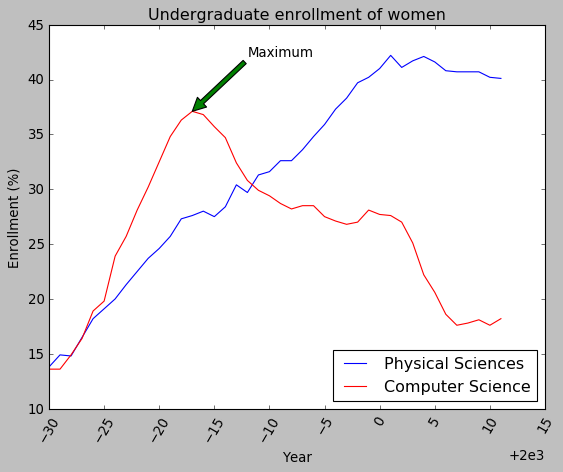

In [91]:
plt.plot(bach.Year, bach['Physical Sciences'],label='Physical Sciences', color='blue')
plt.plot(bach.Year,bach['Computer Science'],label='Computer Science',color='red')
plt.legend(loc='lower right')

cs_max = bach['Computer Science'].max()
yr_max = bach.iloc[bach['Computer Science'].idxmax()].Year

plt.annotate('Maximum',xy=(yr_max,cs_max),xytext=(yr_max+5,cs_max+5),arrowprops=dict(facecolor='green'))


plt.xticks(rotation=60)
plt.xlabel('Year')
plt.ylabel('Enrollment (%)')
plt.title('Undergraduate enrollment of women')
plt.show()

In [21]:
bach['Computer Science'].idxmax()

13

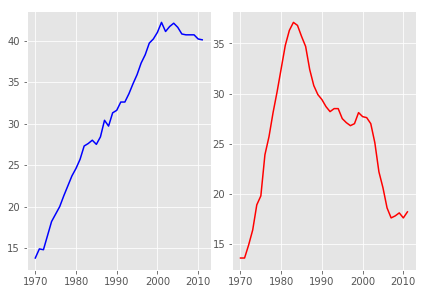

In [28]:
plt.style.use('ggplot')
plt.axes([0.05,0.05,0.425,0.9])
plt.plot(bach.Year, bach['Physical Sciences'], color='blue')
plt.axes([0.525,0.05,0.425,0.9])
plt.plot(bach.Year,bach['Computer Science'],color='red')
plt.show()

Temporary styling

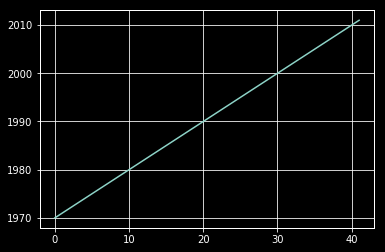

In [88]:
with plt.style.context(('dark_background')):
    plt.plot(bach.Year)

reset style to default

In [92]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

(0, 50)

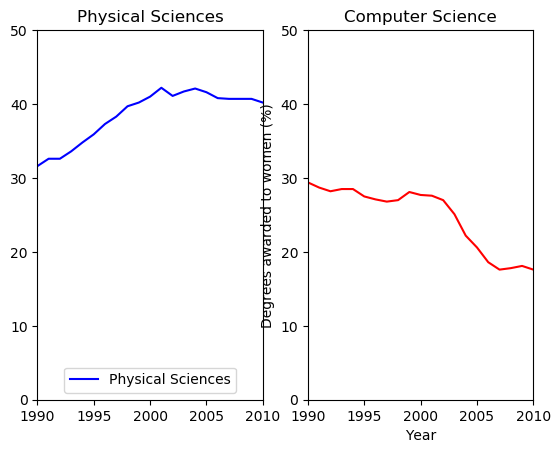

In [93]:
plt.subplot(1,2,1)
plt.plot(bach.Year, bach['Physical Sciences'],label='Physical Sciences', color='blue')
plt.title('Physical Sciences')
plt.axis([1990,2010,0,50])
plt.legend(loc='lower center')

plt.subplot(1,2,2)
plt.plot(bach.Year,bach['Computer Science'],label='Physical Sciences',color='red')
plt.title('Computer Science')
plt.xlabel('Year')
plt.ylabel('Degrees awarded to women (%)')
plt.xlim([1990,2010])
plt.ylim((0,50))

## Visualizing 2D array and images

Contour plot, 2d histogram, images, histrogram and cumulative distribution function of a gray scale image, Equalizing an image histogram, Extracting bivariate histograms from a color image.

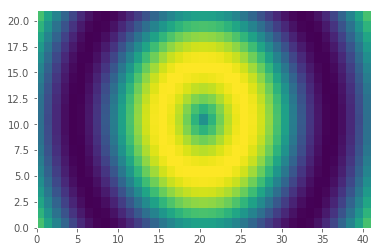

In [31]:
# Generate two 1-D arrays: u, v
u = np.linspace(-2, 2, 41)
v = np.linspace(-1, 1, 21)

# Generate 2-D arrays from u and v: X, Y
X,Y = np.meshgrid(u,v)

# Compute Z based on X and Y
Z = np.sin(3*np.sqrt(X**2 + Y**2)) 

# Display the resulting image with pcolor()
plt.pcolor(Z)
plt.show()

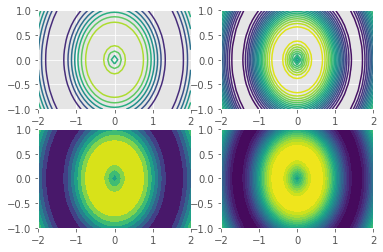

In [32]:
# Generate a default contour map of the array Z
plt.subplot(2,2,1)
plt.contour(X,Y,Z)

# Generate a contour map with 20 contours
plt.subplot(2,2,2)
plt.contour(X,Y,Z,20)

# Generate a default filled contour map of the array Z
plt.subplot(2,2,3)
plt.contourf(X,Y,Z)

# Generate a default filled contour map with 20 contours
plt.subplot(2,2,4)
plt.contourf(X,Y,Z,20)


In [34]:
auto = pd.read_csv('data/auto-mpg.csv')
auto.head()

,mpg,cyl,displ,hp,weight,accel,yr,origin,name,color,size,marker
0,18.0,6,250.0,88,3139,14.5,71,US,ford mustang,red,27.370336,o
1,9.0,8,304.0,193,4732,18.5,70,US,hi 1200d,green,62.199511,o
2,36.1,4,91.0,60,1800,16.4,78,Asia,honda civic cvcc,blue,9.000000,x
3,18.5,6,250.0,98,3525,19.0,77,US,ford granada,red,34.515625,o
4,34.3,4,97.0,78,2188,15.8,80,Europe,audi 4000,blue,13.298178,s


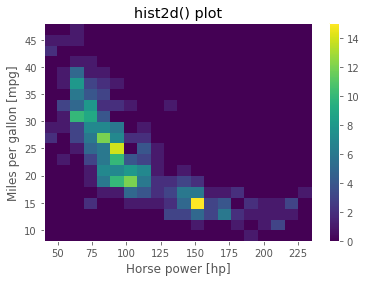

In [35]:
plt.hist2d(auto.hp,auto.mpg,bins=(20,20),range=((40,235),(8,48)))

# Add a color bar to the histogram
plt.colorbar()

# Add labels, title, and display the plot
plt.xlabel('Horse power [hp]')
plt.ylabel('Miles per gallon [mpg]')
plt.title('hist2d() plot')
plt.show()

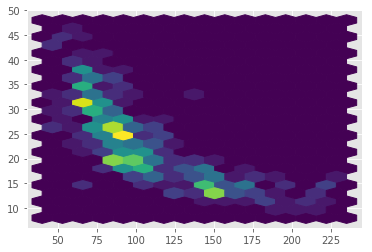

In [36]:
plt.hexbin(auto.hp,auto.mpg,gridsize=(15,12),extent=(40,235,8,48))

In [39]:
img = plt.imread('data/Astronaut-EVA.jpg')

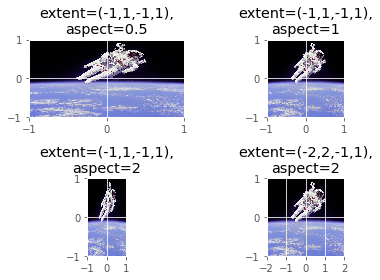

In [40]:
# Specify the extent and aspect ratio of the top left subplot
plt.subplot(2,2,1)
plt.title('extent=(-1,1,-1,1),\naspect=0.5') 
plt.xticks([-1,0,1])
plt.yticks([-1,0,1])
plt.imshow(img, extent=(-1,1,-1,1), aspect=0.5)

# Specify the extent and aspect ratio of the top right subplot
plt.subplot(2,2,2)
plt.title('extent=(-1,1,-1,1),\naspect=1')
plt.xticks([-1,0,1])
plt.yticks([-1,0,1])
plt.imshow(img, extent=(-1,1,-1,1), aspect=1)

# Specify the extent and aspect ratio of the bottom left subplot
plt.subplot(2,2,3)
plt.title('extent=(-1,1,-1,1),\naspect=2')
plt.xticks([-1,0,1])
plt.yticks([-1,0,1])
plt.imshow(img, extent=(-1,1,-1,1), aspect=2)

# Specify the extent and aspect ratio of the bottom right subplot
plt.subplot(2,2,4)
plt.title('extent=(-2,2,-1,1),\naspect=2')
plt.xticks([-2,-1,0,1,2])
plt.yticks([-1,0,1])
plt.imshow(img,extent=(-2,2,-1,1), aspect = 2)

# Improve spacing and display the figure
plt.tight_layout()
plt.show()

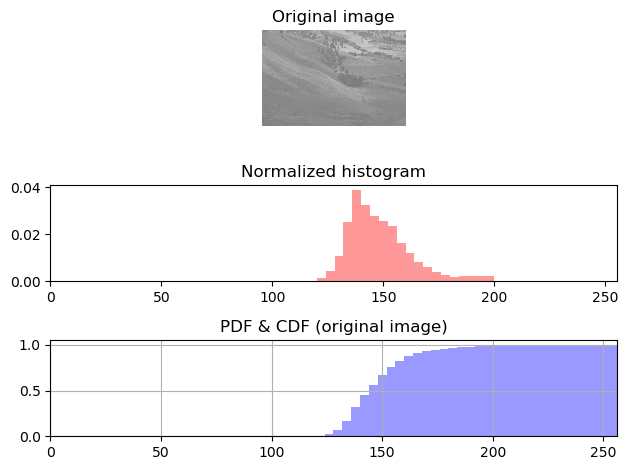

In [101]:
image = plt.imread('data/hawkes_bay.jpg')

plt.subplot(3,1,1)
plt.title('Original image')
plt.axis('off')
plt.imshow(image, cmap='gray')

# Flatten the image into 1 dimension: pixels
pixels = image.flatten()

# Display a histogram of the pixels in the bottom subplot
plt.subplot(3,1,2)
plt.xlim((0,255))
plt.title('Normalized histogram')
plt.hist(pixels,bins=64,range=(0,256),density=True,color='red',alpha=0.4)


# Display a cumulative histogram of the pixels
plt.subplot(3,1,3)
cdf = plt.hist(pixels, bins=64, range=(0,256),
               density=True, cumulative=True,
               color='blue', alpha=0.4)
               
# Specify x-axis range, hide axes, add title and display plot
plt.xlim((0,256))
plt.grid(True)
plt.title('PDF & CDF (original image)')
plt.tight_layout()
plt.show()


Equalizing an image histogram. Histogram equalization is an image processing procedure that reassigns image pixel intensities. The basic idea is to use interpolation to map the original CDF of pixel intensities to a CDF that is almost a straight line. In essence, the pixel intensities are spread out and this has the practical effect of making a sharper, contrast-enhanced image. 

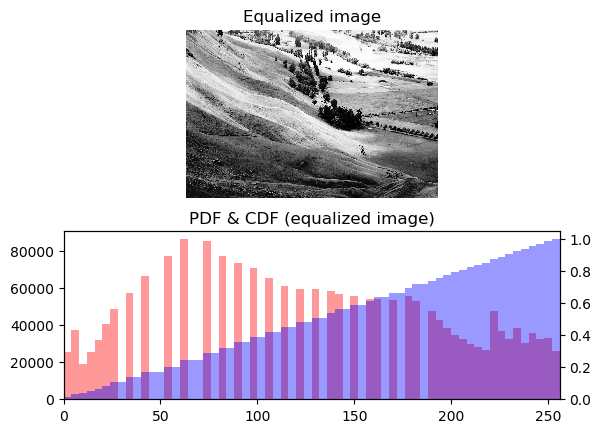

In [113]:
# Load the image into an array: image
image = plt.imread('data/hawkes_bay.jpg')

# Flatten the image into 1 dimension: pixels
pixels = image.flatten()

# Generate a cumulative histogram
cdf, bins, patches = plt.hist(pixels, bins=256, range=(0,256), density=True, cumulative=True)
new_pixels = np.interp(pixels, bins[:-1], cdf*255)

# Reshape new_pixels as a 2-D array: new_image
new_image = new_pixels.reshape(image.shape)

# Display the new image with 'gray' color map
plt.subplot(2,1,1)
plt.title('Equalized image')
plt.axis('off')
plt.imshow(new_image.astype(int),cmap='gray')

# Generate a histogram of the new pixels
plt.subplot(2,1,2)
pdf = plt.hist(new_pixels, bins=64, range=(0,256), density=False,
               color='red', alpha=0.4)
plt.grid(False)

# Use plt.twinx() to overlay the CDF in the bottom subplot
plt.twinx()
plt.xlim((0,256))
plt.grid(False)

# Add title
plt.title('PDF & CDF (equalized image)')

# Generate a cumulative histogram of the new pixels
cdf = plt.hist(new_pixels, bins=64, range=(0,256),
               cumulative=True, density=True,
               color='blue', alpha=0.4)
plt.show()


Extracting bivariate histograms from a color image. Rather than overlaying univariate histograms of intensities in distinct channels, it is also possible to view the joint variation of pixel intensity in two different channels.

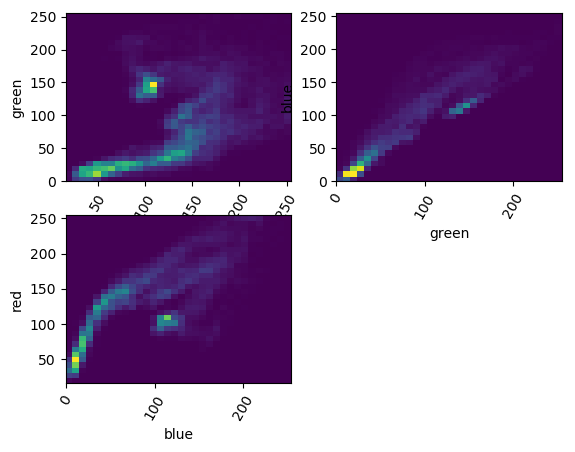

In [115]:
# Load the image into an array: image
image = plt.imread('data/nebula.jpg')

# Extract RGB channels and flatten into 1-D array
red, blue, green = image[:,:,0], image[:,:,1], image[:,:,2]
red_pixels = red.flatten()
blue_pixels = blue.flatten()
green_pixels = green.flatten()

# Generate a 2-D histogram of the red and green pixels
plt.subplot(2,2,1)
plt.grid(False) 
plt.xticks(rotation=60)
plt.xlabel('red')
plt.ylabel('green')
plt.hist2d(x=red_pixels,y=green_pixels,bins=(32,32))

# Generate a 2-D histogram of the green and blue pixels
plt.subplot(2,2,2)
plt.grid(False)
plt.xticks(rotation=60)
plt.xlabel('green')
plt.ylabel('blue')
plt.hist2d(x=green_pixels,y=blue_pixels,bins=(32,32))

# Generate a 2-D histogram of the blue and red pixels
plt.subplot(2,2,3)
plt.grid(False)
plt.xticks(rotation=60)
plt.xlabel('blue')
plt.ylabel('red')
plt.hist2d(x=blue_pixels,y=red_pixels,bins=(32,32))

# Display the plot
plt.show()


## Statistical plots with Seaborn

 lmplot, residplot, regplot, jointplot, hue, violinplot, striplot, swamplot, pairplot, heatmap
 
 regplot and lmplot are similar, but lmplot support hue and row options 

In [41]:
import seaborn as sns

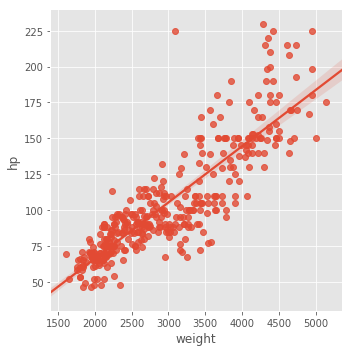

In [75]:
sns.lmplot(x='weight', y='hp', data=auto)


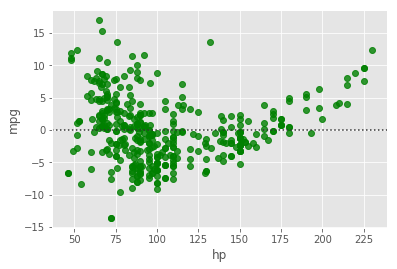

In [46]:
sns.residplot(x='hp', y='mpg', data=auto, color='green')

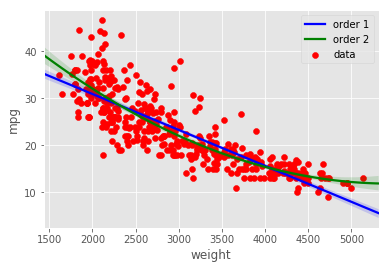

In [47]:
# Generate a scatter plot of 'weight' and 'mpg' using red circles
plt.scatter(auto['weight'], auto['mpg'], label='data', color='red', marker='o')

# Plot in blue a linear regression of order 1 between 'weight' and 'mpg'
sns.regplot(x='weight', y='mpg', data=auto, scatter=None, color='blue', label='order 1',order =1)

# Plot in green a linear regression of order 2 between 'weight' and 'mpg'
sns.regplot(x='weight', y='mpg', data=auto, scatter=None, color='green',order=2, label='order 2')

# Add a legend and display the plot
plt.legend(loc='upper right')
plt.show()

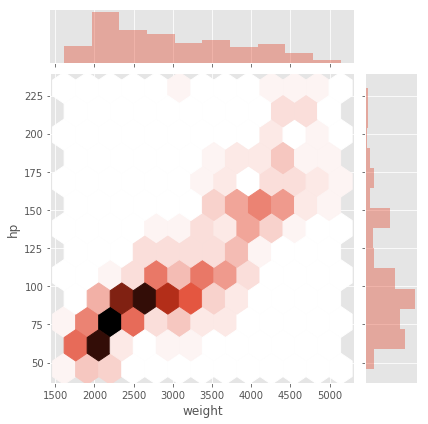

In [57]:
sns.jointplot(x='weight', y='hp', data=auto)

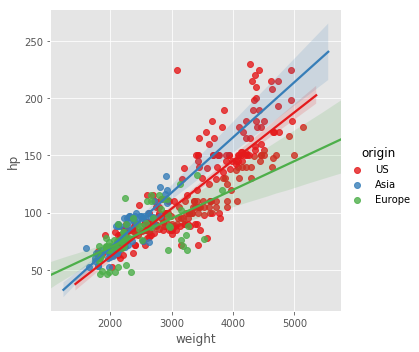

In [48]:
# Plot a linear regression between 'weight' and 'hp', with a hue of 'origin' and palette of 'Set1'
sns.lmplot(x='weight',y='hp',data=auto,hue='origin',palette='Set1')

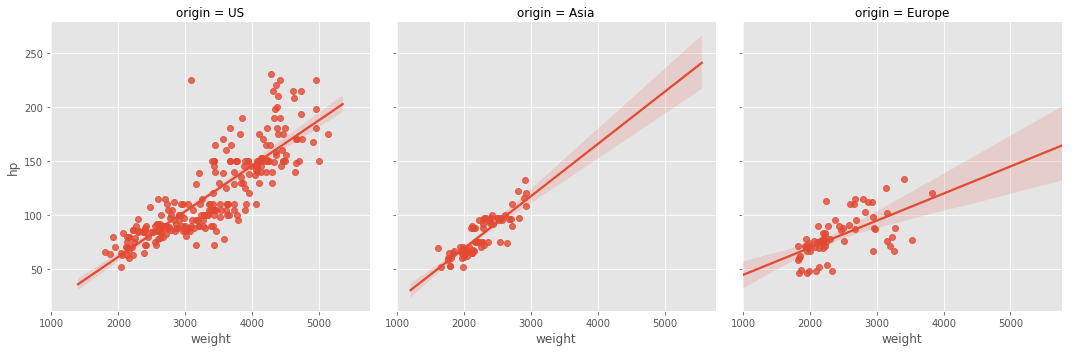

In [74]:
# Plot linear regressions between 'weight' and 'hp' grouped row-wise by 'origin'
sns.lmplot(x='weight',y='hp',data=auto,col='origin')

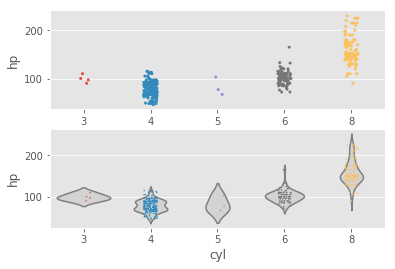

In [56]:
plt.subplot(2,1,1)
# Make a strip plot of 'hp' grouped by 'cyl', using jitter 
sns.stripplot(x='cyl', y='hp', data=auto, size=3, jitter=True)

plt.subplot(2,1,2)
# Generate the same violin plot again with a color of 'lightgray' and without inner annotations
sns.violinplot(x='cyl', y='hp', data=auto,color='lightgray',inner=None)

# Overlay a strip plot on the violin plot
sns.stripplot(x='cyl',y='hp',data=auto,jitter=True,size=1.5)

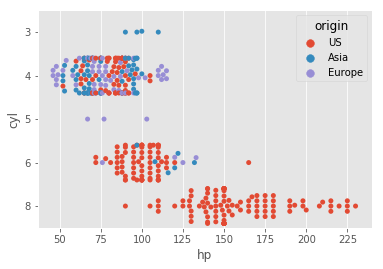

In [54]:
# Generate a swarm plot of 'hp' grouped vertically by 'cyl' with a hue of 'origin'
sns.swarmplot(x='hp',y='cyl',data=auto,hue='origin',orient='h')

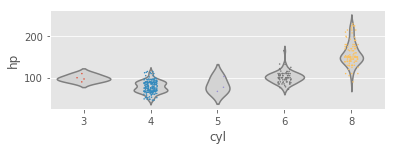

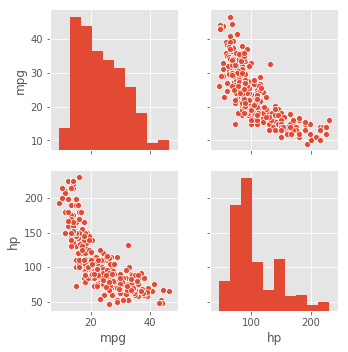

In [63]:
# Plot the pairwise joint distributions from the DataFrame 
sns.pairplot(auto[['mpg','hp','origin']])

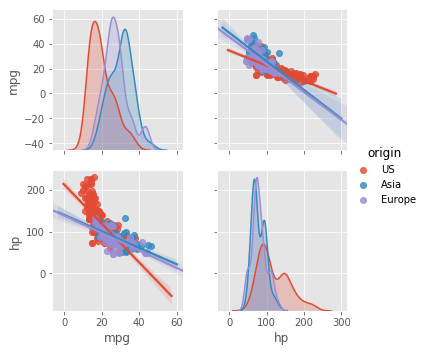

In [62]:
# Plot the pairwise joint distributions grouped by 'origin' along with regression lines
sns.pairplot(auto[['mpg','hp','origin']],kind='reg',hue='origin')

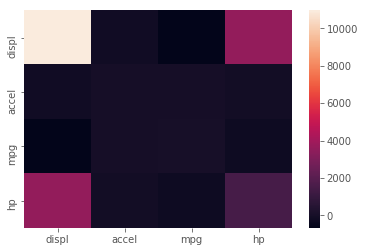

In [70]:
sns.heatmap(auto[['displ','accel','mpg','hp']].cov())

## Histogram 

In [3]:
# import all modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read in the DataFrame
df = pd.read_csv('data/schoolimprovement2010grants.csv')
df.head()

,Unnamed: 0,School Name,City,State,District Name,Model Selected,Award_Amount,Region
0,0,HOGARTH KINGEEKUK MEMORIAL SCHOOL,SAVOONGA,AK,BERING STRAIT SCHOOL DISTRICT,Transformation,471014,West
1,1,AKIACHAK SCHOOL,AKIACHAK,AK,YUPIIT SCHOOL DISTRICT,Transformation,520579,West
2,2,GAMBELL SCHOOL,GAMBELL,AK,BERING STRAIT SCHOOL DISTRICT,Transformation,449592,West
3,3,BURCHELL HIGH SCHOOL,WASILLA,AK,MATANUSKA-SUSITNA BOROUGH SCHOOL DISTRICT,Transformation,641184,West
4,4,AKIAK SCHOOL,AKIAK,AK,YUPIIT SCHOOL DISTRICT,Transformation,399686,West


compare plt histogram plot and sns.displot

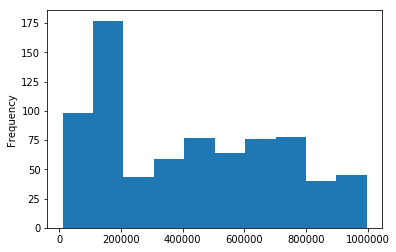

<Figure size 432x288 with 0 Axes>

In [4]:
# Display pandas histogram
df['Award_Amount'].plot.hist()
plt.show()

# Clear out the pandas histogram
plt.clf()

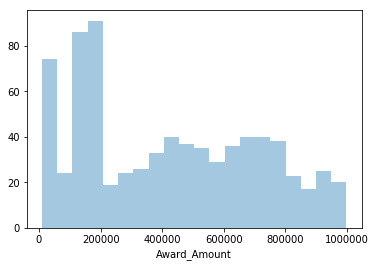

In [6]:
# Create a distplot
sns.distplot(df['Award_Amount'],
             kde=False,
             bins=20)

# Display the plot
plt.show()

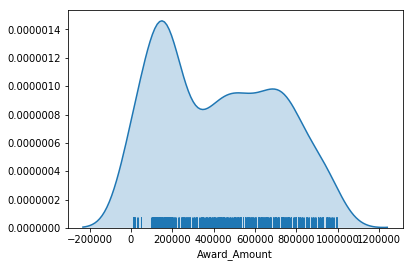

In [7]:
# Create a distplot of the Award Amount
sns.distplot(df['Award_Amount'],
             hist=False,
             rug=True,
             kde_kws={'shade':True})

# Plot the results
plt.show()

 regplot and lmplot are similar, but lmplot support hue and row options 

In [8]:
# Read in the DataFrame
df = pd.read_csv('data/insurance_premiums.csv')
df.head()

,State,fatal_collisions,fatal_collisions_speeding,fatal_collisions_alc,fatal_collisions_not_distracted,fatal_collisions_no_hist,premiums,insurance_losses,Region
0,Alabama,18.8,39,30,96,80,784.55,145.08,South
1,Alaska,18.1,41,25,90,94,1053.48,133.93,West
2,Arizona,18.6,35,28,84,96,899.47,110.35,West
3,Arkansas,22.4,18,26,94,95,827.34,142.39,South
4,California,12.0,35,28,91,89,878.41,165.63,West


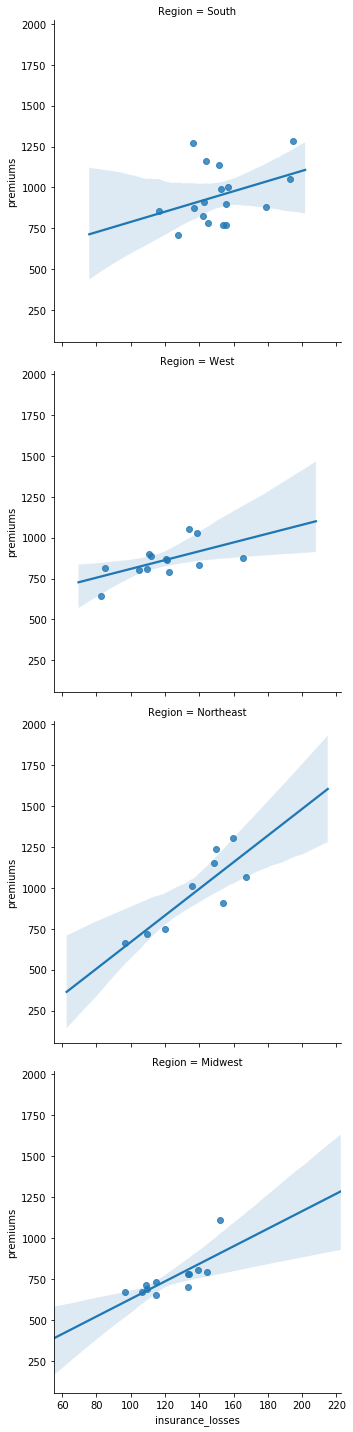

In [9]:
# Create a regression plot with multiple rows
sns.lmplot(data=df,
           x="insurance_losses",
           y="premiums",
           row="Region")

# Show the plot
plt.show()

## Set axes

In [10]:
# Read in the DataFrame
df = pd.read_csv('data/FY18_4050_FMRs.csv')
df.head()

,fips2010,fmr_0,fmr_1,fmr_2,fmr_3,fmr_4,state,metro_code,areaname,county,cousub,countyname,county_town_name,pop2010,acs_2017_2,state_alpha,fmr_type,metro,fmr_pct_chg,fmr_dollar_chg
0,100199999,588,691,829,1055,1451,1,METRO33860M33860,"Montgomery, AL MSA",1,99999,Autauga County,Autauga County,54571.0,822,AL,40,1,0.008516,7
1,100399999,729,762,879,1280,1471,1,METRO19300M19300,"Daphne-Fairhope-Foley, AL MSA",3,99999,Baldwin County,Baldwin County,182265.0,977,AL,40,1,-0.100307,-98
2,100599999,491,494,657,824,929,1,NCNTY01005N01005,"Barbour County, AL",5,99999,Barbour County,Barbour County,27457.0,671,AL,40,0,-0.020864,-14
3,100799999,692,768,882,1176,1315,1,METRO13820M13820,"Birmingham-Hoover, AL HUD Metro FMR Area",7,99999,Bibb County,Bibb County,22915.0,866,AL,40,1,0.018476,16
4,100999999,692,768,882,1176,1315,1,METRO13820M13820,"Birmingham-Hoover, AL HUD Metro FMR Area",9,99999,Blount County,Blount County,57322.0,866,AL,40,1,0.018476,16


C:\Users\Benny\Anaconda3\envs\fastai\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


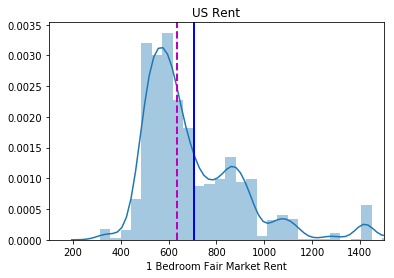

In [13]:
# Create a figure and axes
fig, ax = plt.subplots()

# Plot the distribution of 1 bedroom rents
sns.distplot(df['fmr_1'], ax=ax)

# Modify the properties of the plot
ax.set(xlabel="1 Bedroom Fair Market Rent",
       xlim=(100,1500),
       title="US Rent")

median = df['fmr_1'].median()
mean = df['fmr_1'].mean()


# Add vertical lines for the median and mean
ax.axvline(x=median, color='m', label='Median', linestyle='--', linewidth=2)
ax.axvline(x=mean, color='b', label='Mean', linestyle='-', linewidth=2)


# Display the plot
plt.show()

## `stripplot()` and `swarmplot()`

In [14]:
# Read in the DataFrame
df = pd.read_csv('data/schoolimprovement2010grants.csv')
df.head()

,Unnamed: 0,School Name,City,State,District Name,Model Selected,Award_Amount,Region
0,0,HOGARTH KINGEEKUK MEMORIAL SCHOOL,SAVOONGA,AK,BERING STRAIT SCHOOL DISTRICT,Transformation,471014,West
1,1,AKIACHAK SCHOOL,AKIACHAK,AK,YUPIIT SCHOOL DISTRICT,Transformation,520579,West
2,2,GAMBELL SCHOOL,GAMBELL,AK,BERING STRAIT SCHOOL DISTRICT,Transformation,449592,West
3,3,BURCHELL HIGH SCHOOL,WASILLA,AK,MATANUSKA-SUSITNA BOROUGH SCHOOL DISTRICT,Transformation,641184,West
4,4,AKIAK SCHOOL,AKIAK,AK,YUPIIT SCHOOL DISTRICT,Transformation,399686,West


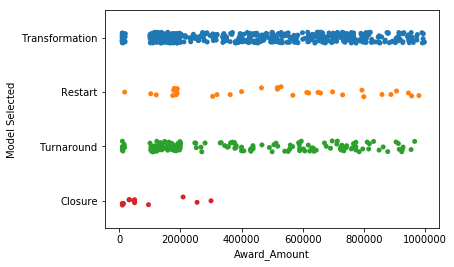

In [15]:
# Create the stripplot
sns.stripplot(data=df,
         x='Award_Amount',
         y='Model Selected',
         jitter=True)

plt.show()

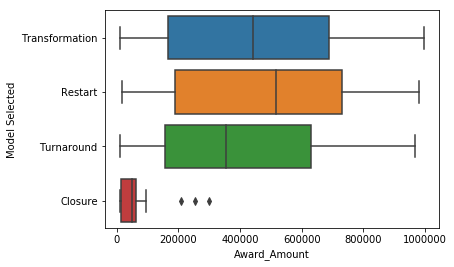

<Figure size 432x288 with 0 Axes>

In [16]:
# Create a boxplot
sns.boxplot(data=df,
         x='Award_Amount',
         y='Model Selected')

plt.show()
plt.clf()

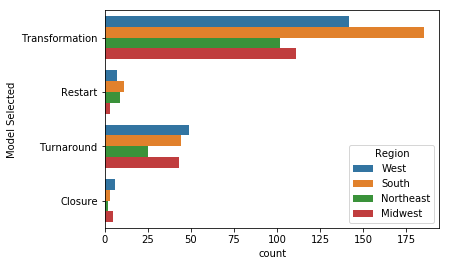

<Figure size 432x288 with 0 Axes>

In [17]:
# Show a countplot with the number of models used with each region a different color
sns.countplot(data=df,
         y="Model Selected",
         hue="Region")

plt.show()
plt.clf()

## Regression and residual plots

In [19]:
df = pd.read_csv('data/college_datav3.csv')
df.head()

,INSTNM,OPEID,REGION,SAT_AVG_ALL,PCTPELL,PCTFLOAN,ADM_RATE_ALL,UG,AVGFACSAL,COMPL_RPY_5YR_RT,...,CONTROL,WOMENONLY,MENONLY,LOCALE,Tuition,Degree_Type,Ownership,Regions,Locales,Locale_Short
0,Alabama A & M University,100200,5,850.0,0.7249,0.8159,0.653841,4380.0,7017.0,0.477631579,...,1,0.0,0.0,12.0,13435.0,Graduate,Public,South East,City: Midsize,City
1,University of Alabama at Birmingham,105200,5,1147.0,0.3505,0.5218,0.604275,10331.0,10221.0,0.673230442,...,1,0.0,0.0,12.0,16023.0,Graduate,Public,South East,City: Midsize,City
2,Amridge University,2503400,5,NaN,0.7455,0.8781,NaN,98.0,3217.0,0.636363636,...,2,0.0,0.0,12.0,8862.0,Graduate,Private non-profit,South East,City: Midsize,City
3,University of Alabama in Huntsville,105500,5,1221.0,0.3179,0.4589,0.811971,5220.0,9514.0,0.762222222,...,1,0.0,0.0,12.0,18661.0,Graduate,Public,South East,City: Midsize,City
4,Alabama State University,100500,5,844.0,0.7567,0.7692,0.463858,4348.0,7940.0,0.43006993,...,1,0.0,0.0,12.0,7400.0,Graduate,Public,South East,City: Midsize,City


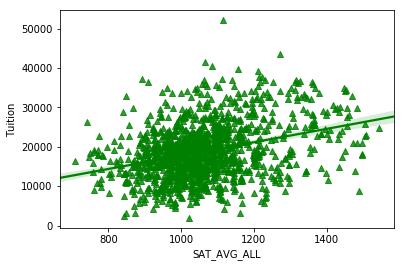

<Figure size 432x288 with 0 Axes>

In [20]:
# Display a regression plot for Tuition
sns.regplot(data=df,
         y='Tuition',
         x="SAT_AVG_ALL",
         marker='^',
         color='g')

plt.show()
plt.clf()

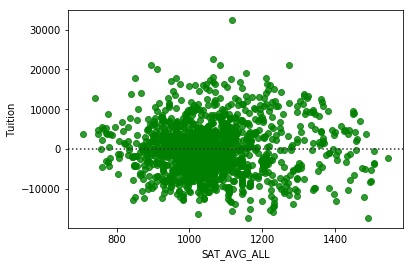

<Figure size 432x288 with 0 Axes>

In [21]:
# Display the residual plot
sns.residplot(data=df,
          y='Tuition',
          x="SAT_AVG_ALL",
          color='g')

plt.show()
plt.clf()

 Since this data is continuous, using x_bins can be useful to break the percentages into categories in order to summarize and understand the data.

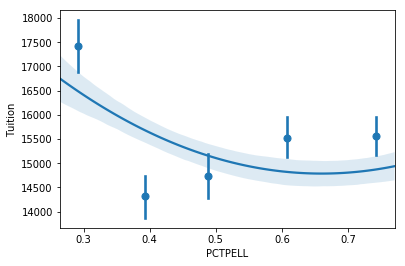

<Figure size 432x288 with 0 Axes>

In [23]:
# Create another plot that estimates the tuition by PCTPELL 
# estimate using polynomial order 2
sns.regplot(data=df,
            y='Tuition',
            x="PCTPELL",
            x_bins=5,order=2)

plt.show()
plt.clf()

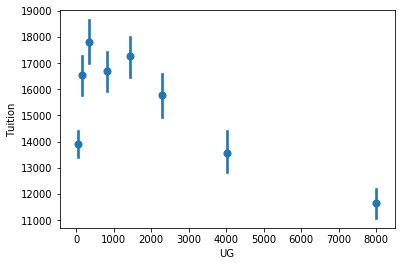

<Figure size 432x288 with 0 Axes>

In [26]:
# Create a scatter plot by disabling the regression line
sns.regplot(data=df,
            y='Tuition',
            x="UG",
            fit_reg=False,x_bins=8)

plt.show()
plt.clf()

## Matrix plots 

- heatmaps

In [27]:
df = pd.read_csv('data/daily_show_guests_cleaned.csv')
df.head()

,YEAR,GoogleKnowlege_Occupation,Show,Group,Raw_Guest_List
0,1999,actor,1/11/99,Acting,Michael J. Fox
1,1999,Comedian,1/12/99,Comedy,Sandra Bernhard
2,1999,television actress,1/13/99,Acting,Tracey Ullman
3,1999,film actress,1/14/99,Acting,Gillian Anderson
4,1999,actor,1/18/99,Acting,David Alan Grier


YEAR            1999  2000  2001  2002  2003  2004  2005  2006  2007  2008  \
Group                                                                        
Academic           0     0     2     0     4     1    12     9    13     5   
Acting           108   100    92    84    74    51    44    44    25    26   
Advocacy           0     1     0     1     0     4     0     0     2     3   
Athletics          0     3     1     2     0     2     2     5     4     1   
Business           0     1     0     0     0     2     1     1     2     1   
Clergy             0     0     0     1     1     1     0     0     1     0   
Comedy            25    12    11     5    12     7     5     8     9     7   
Consultant         0     0     0     0     1     4     1     4     2     3   
Government         0     0     2     1     2     3     1     3     1     0   
Media             11    21    31    42    41    45    54    47    47    77   
Military           0     0     0     0     0     0     1     1  

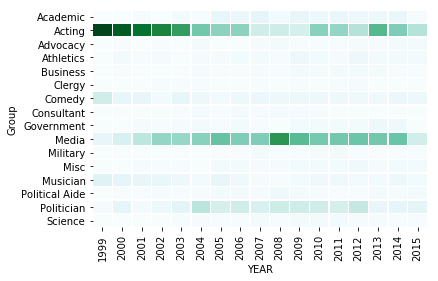

In [29]:
# Create a crosstab table of the data
pd_crosstab = pd.crosstab(df["Group"], df["YEAR"])
print(pd_crosstab)

# Plot a heatmap of the table with no color bar and using the BuGn palette
sns.heatmap(pd_crosstab, cbar=False, cmap="BuGn", linewidths=0.3)

# Rotate tick marks for visibility
plt.yticks(rotation=0)
plt.xticks(rotation=90)

plt.show()

## Building a FacetGrid



In [30]:
df = pd.read_csv('data/college_datav3.csv')
df.head()

,INSTNM,OPEID,REGION,SAT_AVG_ALL,PCTPELL,PCTFLOAN,ADM_RATE_ALL,UG,AVGFACSAL,COMPL_RPY_5YR_RT,...,CONTROL,WOMENONLY,MENONLY,LOCALE,Tuition,Degree_Type,Ownership,Regions,Locales,Locale_Short
0,Alabama A & M University,100200,5,850.0,0.7249,0.8159,0.653841,4380.0,7017.0,0.477631579,...,1,0.0,0.0,12.0,13435.0,Graduate,Public,South East,City: Midsize,City
1,University of Alabama at Birmingham,105200,5,1147.0,0.3505,0.5218,0.604275,10331.0,10221.0,0.673230442,...,1,0.0,0.0,12.0,16023.0,Graduate,Public,South East,City: Midsize,City
2,Amridge University,2503400,5,NaN,0.7455,0.8781,NaN,98.0,3217.0,0.636363636,...,2,0.0,0.0,12.0,8862.0,Graduate,Private non-profit,South East,City: Midsize,City
3,University of Alabama in Huntsville,105500,5,1221.0,0.3179,0.4589,0.811971,5220.0,9514.0,0.762222222,...,1,0.0,0.0,12.0,18661.0,Graduate,Public,South East,City: Midsize,City
4,Alabama State University,100500,5,844.0,0.7567,0.7692,0.463858,4348.0,7940.0,0.43006993,...,1,0.0,0.0,12.0,7400.0,Graduate,Public,South East,City: Midsize,City


In [31]:
df.columns

Index(['INSTNM', 'OPEID', 'REGION', 'SAT_AVG_ALL', 'PCTPELL', 'PCTFLOAN',
       'ADM_RATE_ALL', 'UG', 'AVGFACSAL', 'COMPL_RPY_5YR_RT', 'DEBT_MDN',
       'MEDIAN_HH_INC', 'ICLEVEL', 'HIGHDEG', 'CONTROL', 'WOMENONLY',
       'MENONLY', 'LOCALE', 'Tuition', 'Degree_Type', 'Ownership', 'Regions',
       'Locales', 'Locale_Short'],
      dtype='object')

C:\Users\Benny\Anaconda3\envs\fastai\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


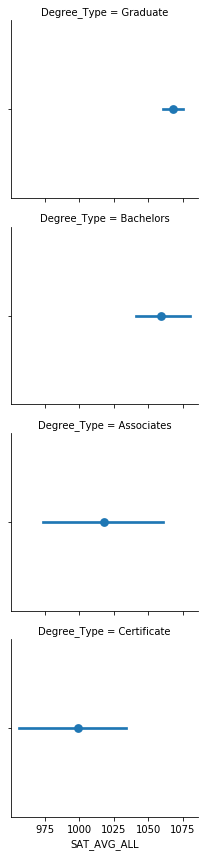

<Figure size 432x288 with 0 Axes>

In [32]:
# Create FacetGrid with Degree_Type and specify the order of the rows using row_order
g2 = sns.FacetGrid(df, 
             row="Degree_Type",
             row_order=['Graduate', 'Bachelors', 'Associates', 'Certificate'])

# Map a pointplot of SAT_AVG_ALL onto the grid
g2.map(sns.pointplot, 'SAT_AVG_ALL')

# Show the plot
plt.show()
plt.clf()

## factor plot

In many cases, Seaborn's factorplot() can be a simpler way to create a FacetGrid. Instead of creating a grid and mapping the plot, we can use the factorplot() to create a plot with one line of code.

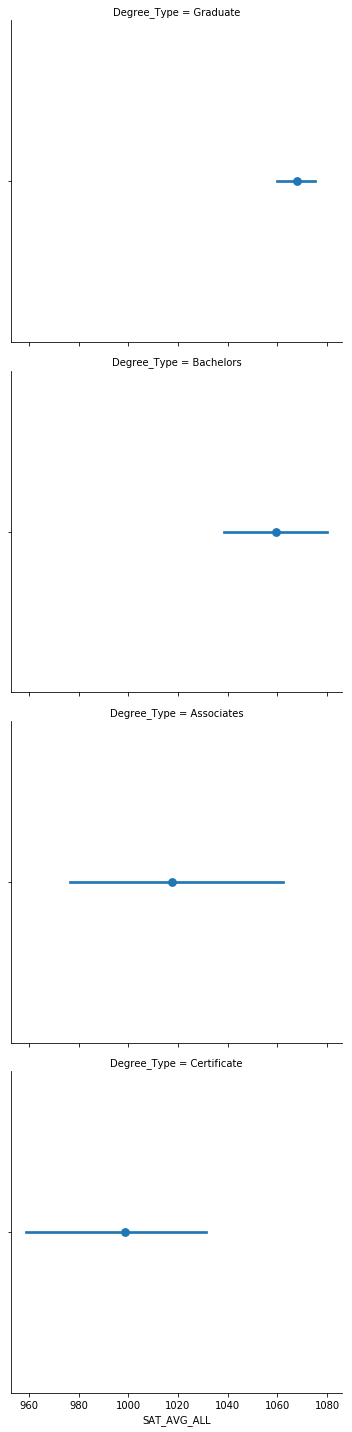

<Figure size 432x288 with 0 Axes>

In [35]:
# Create a facetted pointplot of Average SAT_AVG_ALL scores facetted by Degree Type 
sns.catplot(data=df,
        x='SAT_AVG_ALL',
        kind='point',
        row='Degree_Type',
        row_order=['Graduate', 'Bachelors', 'Associates', 'Certificate'])

plt.show()
plt.clf()

## Combine lmplot with FacetGrid

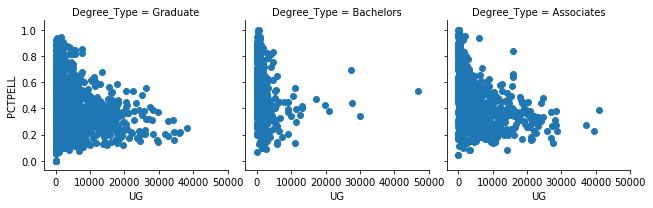

<Figure size 432x288 with 0 Axes>

In [37]:
# Create a FacetGrid varying by column and columns ordered with the degree_order variable
g = sns.FacetGrid(df, col="Degree_Type", col_order=['Graduate', 'Bachelors', 'Associates'])

# Map a scatter plot of Undergrad Population compared to PCTPELL
g.map(plt.scatter, 'UG', 'PCTPELL')

plt.show()
plt.clf()

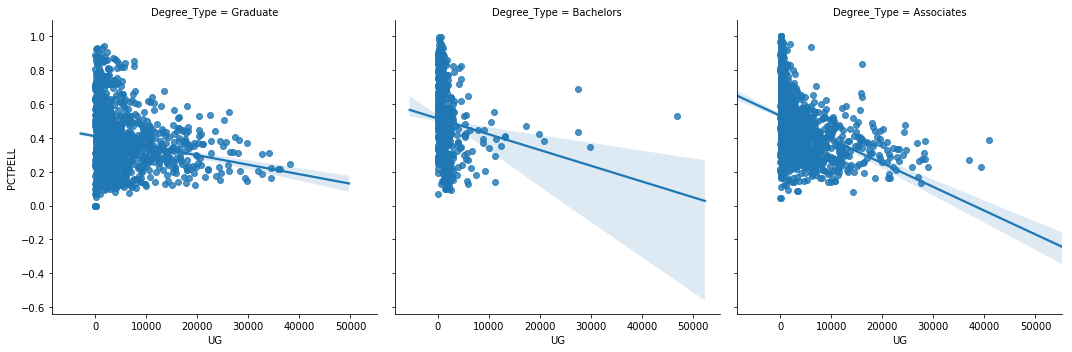

<Figure size 432x288 with 0 Axes>

In [39]:
# Re-create the plot above as an lmplot
sns.lmplot(data=df,
        x='UG',
        y='PCTPELL',
        col="Degree_Type",
        col_order=['Graduate', 'Bachelors', 'Associates'])

plt.show()
plt.clf()

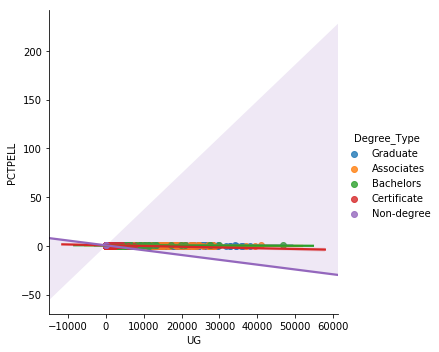

<Figure size 432x288 with 0 Axes>

In [43]:
# or use Hue 
sns.lmplot(data=df,
        x='UG',
        y='PCTPELL',
        hue="Degree_Type")

plt.show()
plt.clf()

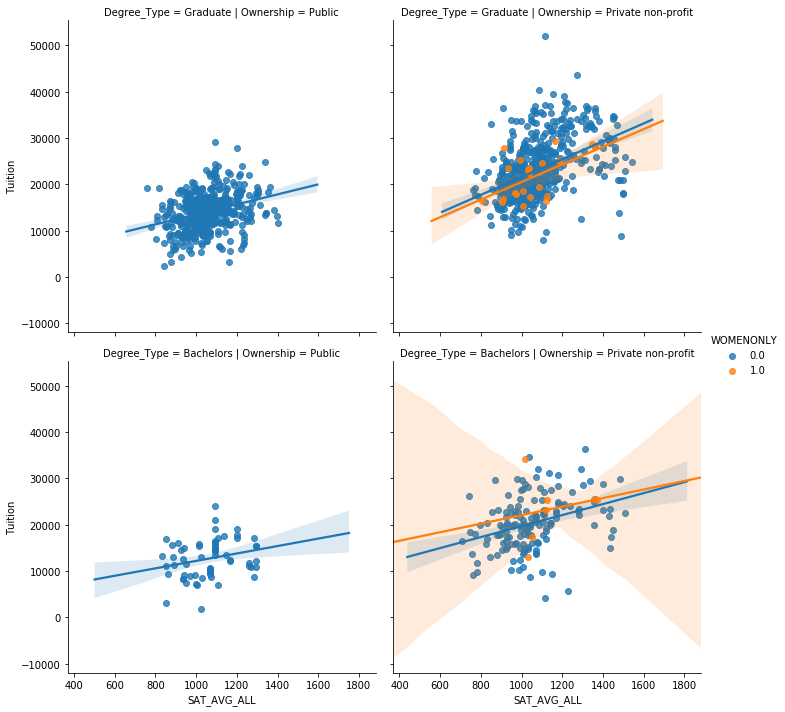

<Figure size 432x288 with 0 Axes>

In [41]:
# Create an lmplot that has a column for Ownership, a row for Degree_Type and hue based on the WOMENONLY column
sns.lmplot(data=df,
        x='SAT_AVG_ALL',
        y='Tuition',
        col="Ownership",
        row='Degree_Type',
        row_order=['Graduate', 'Bachelors'],
        hue='WOMENONLY',
        col_order=['Public', 'Private non-profit'])

plt.show()
plt.clf()

## PairGrid and pairPlot

In [44]:
df = pd.read_csv('data/insurance_premiums.csv')
df.head()

,State,fatal_collisions,fatal_collisions_speeding,fatal_collisions_alc,fatal_collisions_not_distracted,fatal_collisions_no_hist,premiums,insurance_losses,Region
0,Alabama,18.8,39,30,96,80,784.55,145.08,South
1,Alaska,18.1,41,25,90,94,1053.48,133.93,West
2,Arizona,18.6,35,28,84,96,899.47,110.35,West
3,Arkansas,22.4,18,26,94,95,827.34,142.39,South
4,California,12.0,35,28,91,89,878.41,165.63,West


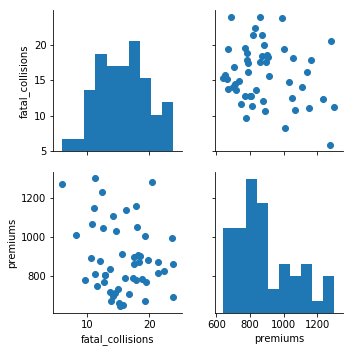

<Figure size 432x288 with 0 Axes>

In [46]:
# Create the same pairgrid but map a histogram on the diag
g = sns.PairGrid(df, vars=["fatal_collisions", "premiums"])
g2 = g.map_diag(plt.hist)
g3 = g2.map_offdiag(plt.scatter)

plt.show()
plt.clf()

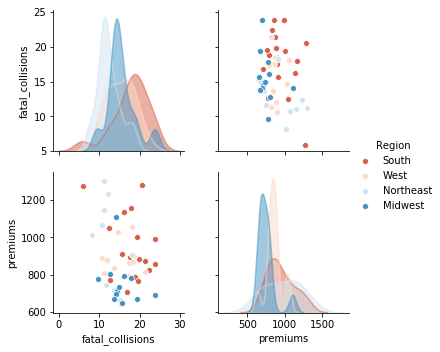

<Figure size 432x288 with 0 Axes>

In [47]:
# Plot the same data but use a different color palette and color code by Region
sns.pairplot(data=df,
        vars=["fatal_collisions", "premiums"],
        kind='scatter',
        hue='Region',
        palette='RdBu',
        diag_kws={'alpha':.5})

plt.show()
plt.clf()

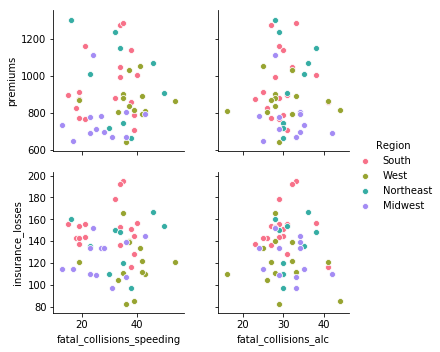

<Figure size 432x288 with 0 Axes>

In [48]:
# Build a pairplot with different x and y variables
sns.pairplot(data=df,
        x_vars=["fatal_collisions_speeding", "fatal_collisions_alc"],
        y_vars=['premiums', 'insurance_losses'],
        kind='scatter',
        hue='Region',
        palette='husl')

plt.show()
plt.clf()

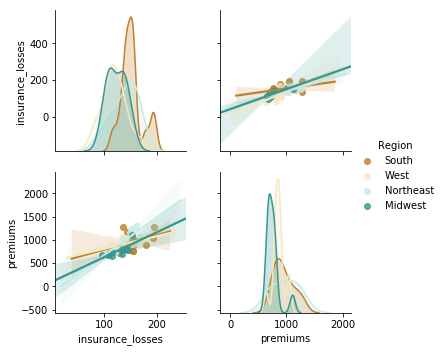

<Figure size 432x288 with 0 Axes>

In [49]:
# plot relationships between insurance_losses and premiums
sns.pairplot(data=df, vars=["insurance_losses", "premiums"],kind='reg',
             palette='BrBG',
             diag_kind = 'kde',
             hue='Region')

plt.show()
plt.clf()

## JointGrid and jointplot

In [51]:
df = pd.read_csv('data/bike_share.csv')
df.head()

,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,total_rentals
0,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


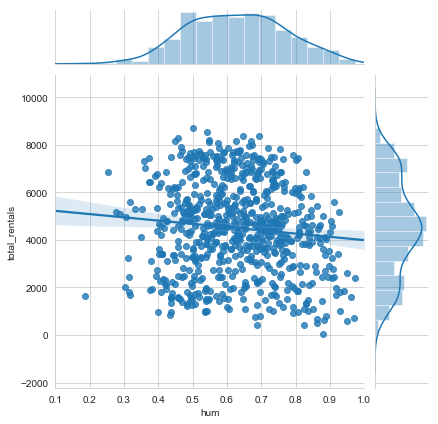

<Figure size 432x288 with 0 Axes>

In [52]:
# Build a JointGrid comparing humidity and total_rentals
sns.set_style("whitegrid")
g = sns.JointGrid(x="hum",
            y="total_rentals",
            data=df,
            xlim=(0.1, 1.0)) 

g.plot(sns.regplot, sns.distplot)

plt.show()
plt.clf()

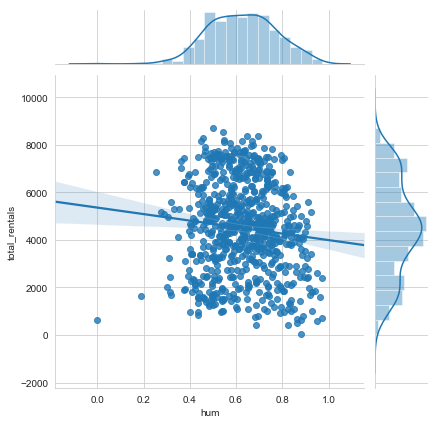

<Figure size 432x288 with 0 Axes>

In [53]:
# Create a jointplot similar to the JointGrid 
sns.jointplot(x="hum",
        y="total_rentals",
        kind='reg',
        data=df)

plt.show()
plt.clf()

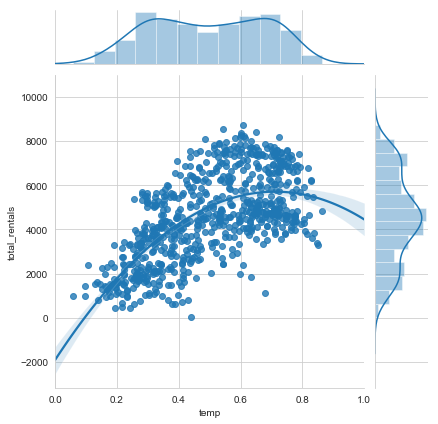

<Figure size 432x288 with 0 Axes>

In [54]:
# Plot temp vs. total_rentals as a regression plot
sns.jointplot(x="temp",
         y="total_rentals",
         kind='reg',
         data=df,
         order=2,
         xlim=(0, 1))

plt.show()
plt.clf()

## Complex jointplots

The jointplot is a convenience wrapper around many of the JointGrid functions. However, it is possible to overlay some of the JointGrid plots on top of the standard jointplot. In this example, we can look at the different distributions for riders that are considered casual versus those that are registered.

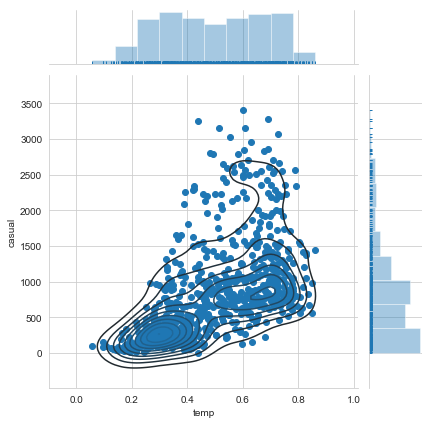

<Figure size 432x288 with 0 Axes>

In [55]:
# Create a jointplot of temp vs. casual riders
# Include a kdeplot over the scatter plot
g = (sns.jointplot(x="temp",
             y="casual",
             kind='scatter',
             data=df,
             marginal_kws=dict(bins=10, rug=True))
    .plot_joint(sns.kdeplot))
    
plt.show()
plt.clf()

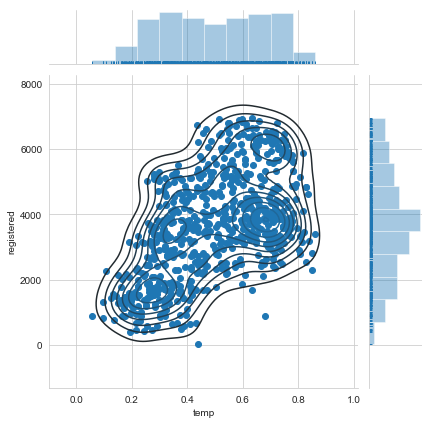

<Figure size 432x288 with 0 Axes>

In [56]:
# Replicate the above plot but only for registered riders
g = (sns.jointplot(x="temp",
             y="registered",
             kind='scatter',
             data=df,
             marginal_kws=dict(bins=10, rug=True))
    .plot_joint(sns.kdeplot))

plt.show()
plt.clf()

## Analyzing time series

plot data with datetime index, Multiple time slices, inset view

In [184]:
stocks = pd.read_csv('data/stocks.csv',index_col='Date',parse_dates=True)
stocks.head()

,AAPL,IBM,CSCO,MSFT
Date,,,,
2000-01-03,111.937502,116.0000,108.0625,116.5625
2000-01-04,102.500003,112.0625,102.0000,112.6250
2000-01-05,103.999997,116.0000,101.6875,113.8125
2000-01-06,94.999998,114.0000,100.0000,110.0000
2000-01-07,99.500001,113.5000,105.8750,111.4375


In [82]:
stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3521 entries, 2000-01-03 to 2013-12-31
Data columns (total 4 columns):
AAPL    3521 non-null float64
IBM     3521 non-null float64
CSCO    3521 non-null float64
MSFT    3521 non-null float64
dtypes: float64(4)
memory usage: 137.5 KB


(array([733042., 733046., 733050., 733054., 733058., 733062., 733066.,
        733070., 733073.]), <a list of 9 Text xticklabel objects>)

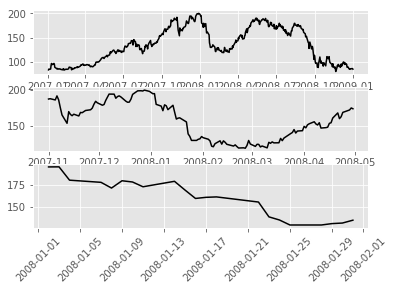

In [86]:
plt.subplot(3,1,1)
view = stocks.AAPL['2007':'2008']
plt.plot(view, color='black')

plt.subplot(3,1,2)
view = stocks.AAPL['2007-11':'2008-04']
plt.plot(view, color='black')

plt.subplot(3,1,3)
view = stocks.AAPL['2008-01']
plt.plot(view, color='black')
plt.xticks(rotation=45)

Plot an inset view

C:\Users\Benny\Anaconda3\envs\fastai\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


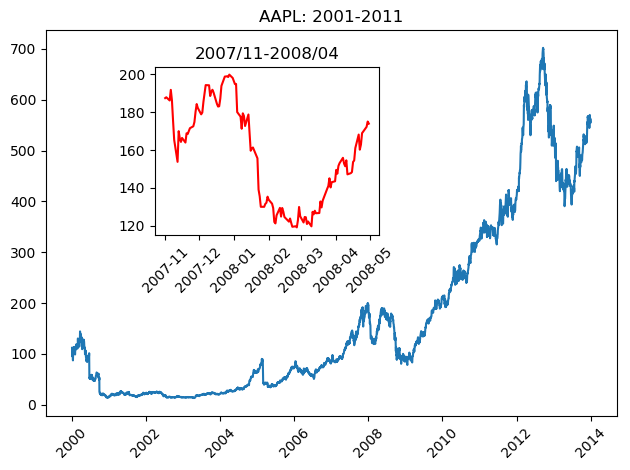

In [186]:
# Slice aapl from Nov. 2007 to Apr. 2008 inclusive: view
view = stocks.AAPL['2007-11':'2008-04']

# Plot the entire series 
plt.plot(stocks.AAPL)
plt.xticks(rotation=45)
plt.title('AAPL: 2001-2011')

# Specify the axes
plt.axes([0.25,0.5,0.35,0.35])

# Plot the sliced series in red using the current axes
plt.plot(view,color='red')
plt.xticks(rotation=45)
plt.title('2007/11-2008/04')
plt.tight_layout()
plt.show()